In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
from sklearn.linear_model import LinearRegression

### Helper Functions

In [2]:
def findcoreporosity(amb_phi, es_phi, c_corr = 0.87):
    dPV = (amb_phi - es_phi)/(1 - es_phi)
    return (amb_phi - c_corr*dPV)/(1 - c_corr*dPV)

def correct_perm2stress(perm,eff_stress, b = 0.13):
    eff_stress = eff_stress *(6894.76/10**6)
    return perm*np.exp(-b * np.sqrt(eff_stress))


def predictModel(points, k, b):
    return k*points + b

### Well 1 Poro Saturation - 
   <b> 
       
       1. Load and Compare Core and Given Porosity Data

In [2]:
basedir = r'Out/'

In [3]:
#Loading log Derived Porosity Data
well1 = pd.read_csv(basedir + 'Well1-PorSw.csv')

In [4]:
well1coreporo = pd.read_csv(basedir + 'well1coreporo.csv', delimiter='\t')
well1coreporo.head()

#I will take 200 as my indicator stress - Applying 0.87 as compaction correction factor

,Sample,Depth,ambient,50,100,200,300,400
0,43,10315.3,11.1,10.9,10.7,10.4,10.2,10.1
1,66,10336.5,21.1,21.0,20.8,20.6,20.5,20.5
2,99,10372.0,25.2,25.1,25.0,24.7,24.5,24.4
3,107,10379.5,22.9,22.8,22.6,22.4,22.3,22.2
4,137,10424.4,26.2,26.1,26.0,25.7,25.6,25.4


In [8]:
#ambient porosity
phi_a = well1coreporo['ambient']/100
#200 erp porosity
phi_200 = well1coreporo['200']/100

core_porosity = phi_a

In [9]:
#Load Given RFT Data for Well1
well1rft = pd.read_csv(basedir + "well1RFT.csv")
well1rft.head()

,TVD,Pressure
0,10450,5650
1,10600,5720
2,10700,5775
3,10800,5820
4,10828,5845


<b>
    
    
    2.Plot Porosities and Saturation

Text(0.5, 0, 'Porosity')

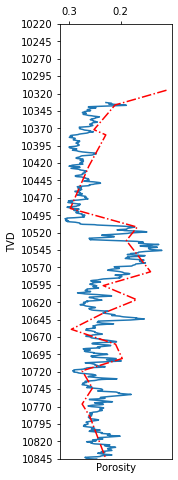

In [9]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))

plt.subplots_adjust(wspace = 0.5)
ax0 = fig.add_subplot(131)
ax0.plot(well1['density_Porosity'], well1['DEPTH'])
ax0.invert_xaxis()
ax0.xaxis.tick_top()
ax0.set_ylim(10220, 10846)
ax0.invert_yaxis()
ax0.set_yticks(np.arange(10220,10846, 25))
ax0.plot(core_porosity,well1coreporo['Depth'], ls = 'dashdot', color = 'r')
ax0.set_ylabel("TVD")
ax0.set_xlabel("Porosity")

# ax1 = fig.add_subplot(132)
# ax1.set_ylim(10220, 10846)
# ax1.set_xlim(0,1)
# ax1.xaxis.tick_top()
# ax1.set_yticks(np.arange(10220, 10846,25))
# ax1.invert_yaxis()
# ax1.plot(well1['Sw'], well1['TVD'])
# ax1.set_ylabel("TVD")
# ax1.set_xlabel("Sw")


# ax2 = fig.add_subplot(133)
# ax2.xaxis.tick_top()
# ax2.set_xlim(5500,6000)
# ax2.scatter(well1rft['Pressure'], well1rft['TVD'])
# ax2.invert_yaxis()

# mplcursors.cursor(hover = True)

# #Fitting lines to RFT
# x = np.array([5790,5900]).reshape(-1,1)
# y = np.array([10828,11075])

# model = LinearRegression()
# model.fit(x, y)

# k1 = model.coef_
# b1 = model.intercept_
# test = np.array([5700,6000])
# pred = predictModel(test, k1, b1)

# ax2.plot(test, pred)

# x1 = np.array([5650,5790]).reshape(-1,1)
# y1 = np.array([10450,10828])

# model = LinearRegression()
# model.fit(x1, y1)

# k2 = model.coef_
# b2 = model.intercept_
# test = np.array([5600,5850])
# pred = predictModel(test, k2, b2)

# ax2.plot(test, pred)

   
<b> 
    
     Overview:
    
     1.Core Porosity Highly matches with log derived porosity
    
     2.OWC is detected exactyly at 10828ft and field top at 10250 ft TVD (will be converted to TVD later on). Total thickness is then 578 ft 
     
</b>

In [20]:
ob_stress_grad = 1 #psi/ft
avg_res_pressure = 5700 #psi

effective_stress = np.dot(ob_stress_grad, well1['TVD']) - 1 * avg_res_pressure
avg_effective_stress = np.average(effective_stress)

In [60]:
well1perm = pd.read_csv(basedir + "/well1perm.csv", delimiter='\t')
well1perm.drop(index = [0,1], columns = ['Water Content', 'Oil Content','Interconnected Porosity', 
                                         'Average Interconnected Porosity'],
                                         inplace = True)
well1perm.rename(columns = {'Air Permeability':'kH',
                            'Air Permeability.1':'kV'}, inplace = True)

In [76]:
well1_kH = well1perm['kH']

well1_kH = np.array(well1_kH, dtype = np.float64)
well1_kH_corr = correct_perm2stress(well1_kH, avg_effective_stress)

well1perm['kH_insitu'] = well1_kH_corr

In [77]:
well1perm

,Sample,Depth,kH,kV,Grain Density,Lithology Code,kH_insitu
2,1.0,10277.2,0.0,NaN,2.71,10.0,0.000000
3,2.0,10278.3,0.0,NaN,2.66,10.0,0.000000
4,3.0,10279.2,0.0,NaN,2.66,10.0,0.000000
5,4.0,10280.0,0.1,NaN,2.64,10.0,0.047212
6,5.0,10281.0,NaN,NaN,2.62,10.0,NaN
...,...,...,...,...,...,...,...
662,551.0,11012.7,380.0,NaN,2.68,20.0,179.404359
663,552.0,11013.9,250.0,NaN,2.66,20.0,118.029183
664,553.0,11014.6,690.0,NaN,2.64,20.0,325.760546
665,554.0,11015.6,170.0,NaN,2.65,20.0,80.259845


## Well 2 Poro Saturation - 
   <b> 
       
       1. Load and Compare Core and Given Porosity Data

In [64]:
well2 = pd.read_csv(basedir + 'Well2-PorSw.csv')

In [71]:
#Load Given RFT Data for Well1
well2rft = pd.read_csv(basedir + "well2RFT.csv")
well2rft.head()

,TVDSS,Pressure
0,10280,5640
1,10550,5705
2,10780,5780
3,10828,5790
4,10828,5790


<b>
    
    
    2.Plot Porosities and Saturation

<IPython.core.display.Javascript object>


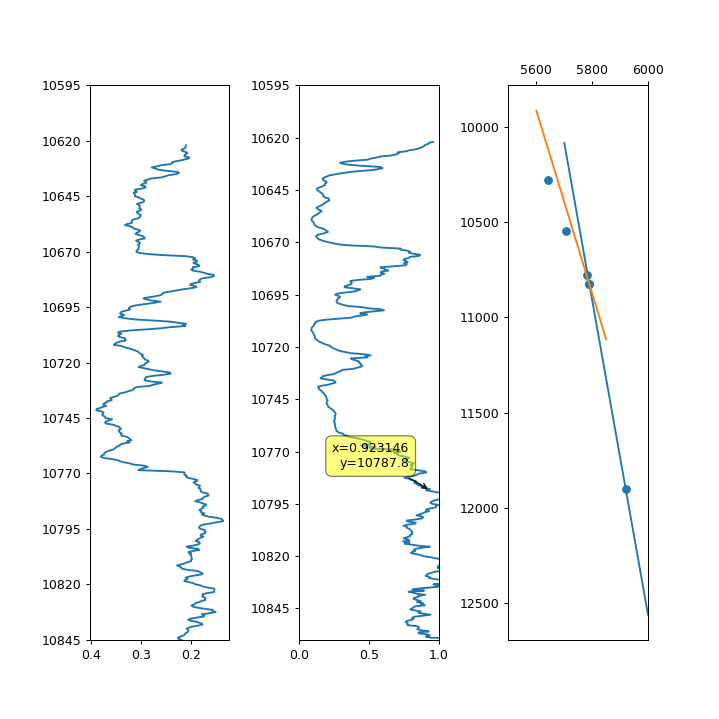

In [86]:
%matplotlib notebook 
fig = plt.figure(figsize = (8,8))
plt.subplots_adjust(wspace = 0.5)

ax0 = fig.add_subplot(131)
ax0.invert_xaxis()
ax0.set_ylim(10595,10675)
ax0.invert_yaxis()
ax0.set_yticks(np.arange(10595,10860, 25))
ax0.plot(well2['Porosity'], well2['TVD'])

ax1 = fig.add_subplot(132)
ax1.set_ylim(10595,10860)
ax1.set_xlim(0,1)
ax1.set_yticks(np.arange(10595,10860, 25))
ax1.invert_yaxis()
ax1.plot(well2['Sw'], well2['TVD'])

ax2 = fig.add_subplot(133)
ax2.xaxis.tick_top()
ax2.set_xlim(5500,6000)
ax2.scatter(well2rft['Pressure'], well2rft['TVDSS'])
ax2.invert_yaxis()

mplcursors.cursor(hover = True)

#Fitting lines to RFT
x = np.array([5790,5920]).reshape(-1,1)
y = np.array([10828,11900])

model = LinearRegression()
model.fit(x, y)

k = model.coef_
b = model.intercept_
test = np.array([5700,6000])
pred = predictModel(test, k, b)

ax2.plot(test, pred)

x1 = np.array([5780,5790]).reshape(-1,1)
y1 = np.array([10780,10828])

model = LinearRegression()
model.fit(x1, y1)

k = model.coef_
b = model.intercept_
test = np.array([5600,5850])
pred = predictModel(test, k, b)

ax2.plot(test, pred)

   
<b> 
    
     Overview:
    
     2.OWC is detected exactyly at 10825 ft and field top at 10622 ft TVD. Total thickness is then 203 ft 
     
</b>

## Well 3 Poro Saturation - 
   <b> 
       
       1. Load and Compare Core and Given Porosity Data

In [39]:
well3 = pd.read_csv(basedir + 'Well3-PorSw.csv')

In [40]:
well3

,Unnamed: 0,DEPTH,Porosity,Rt,Sw
0,0,11325.000362,0.172107,2.99781,0.602281
1,1,11325.500362,0.169683,3.05177,0.605461
2,2,11326.000362,0.166046,3.21668,0.602652
3,3,11326.500362,0.168445,3.22260,0.593525
4,4,11327.000362,0.166076,3.29757,0.595109
...,...,...,...,...,...
1395,1395,12022.500385,0.225778,0.68393,0.961198
1396,1396,12023.000385,0.231914,0.68188,0.937171
1397,1397,12023.500385,0.240046,0.65317,0.925109
1398,1398,12024.000385,0.230468,0.62035,0.988713


<b>
    
    
    2.Plot Porosities and Saturation

<IPython.core.display.Javascript object>


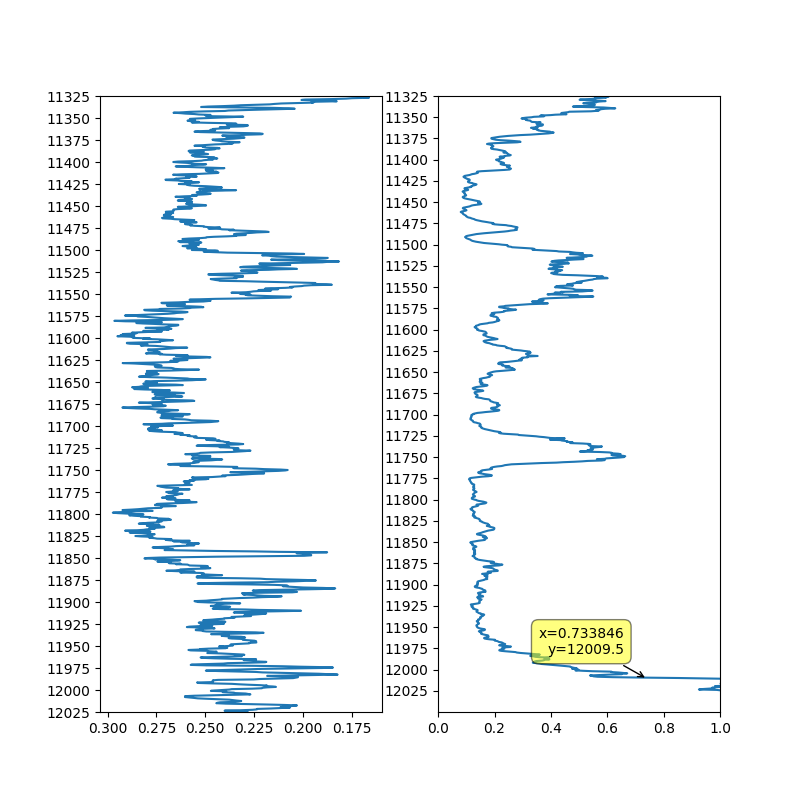

In [46]:
%matplotlib notebook
fig = plt.figure(figsize = (8,8))

ax0 = fig.add_subplot(121)
ax0.invert_xaxis()
ax0.set_ylim(11325, 12050)
ax0.invert_yaxis()
ax0.set_yticks(np.arange(11325,12050, 25))
ax0.plot(well3['Porosity'], well3['DEPTH'])

ax1 = fig.add_subplot(122)
ax1.set_ylim(11325, 12050)
ax1.set_xlim(0,1)
ax1.set_yticks(np.arange(11325,12050, 25))
ax1.invert_yaxis()
ax1.plot(well3['Sw'], well3['DEPTH'])

mplcursors.cursor(hover = True)

<b> 
    
     Overview:
    
     1.OWC is detected exactyly at 12009 ft and field top at 11342 ft MD (will be converted to TVD later on). Total thickness is then 550 ft 
     
</b>

## Well 4 Poro Saturation - 
   <b> 
       
       1. Load and Compare Core and Given Porosity Data

In [56]:
#Loading log Derived Porosity Data
well4 = pd.read_csv(basedir + 'Well4-PorSw.csv')

In [61]:
well4coreporo = pd.read_csv(basedir + 'well2coreporo.csv', delimiter = ',')
well4coreporo

#I will take 200 as my indicator stress - Applying 0.87 as compaction correction factor

,S_No,Depth,Porosity
0,1,11484.2,0.200
1,6,11488.8,0.275
2,13,11495.8,0.235
3,27,11511.1,0.201
4,32,11549.5,0.230
5,36,11553.0,0.193
6,40,11558.0,0.197
7,64,11602.0,0.237
8,71,11636.0,0.230
9,131,11718.4,0.236


<IPython.core.display.Javascript object>


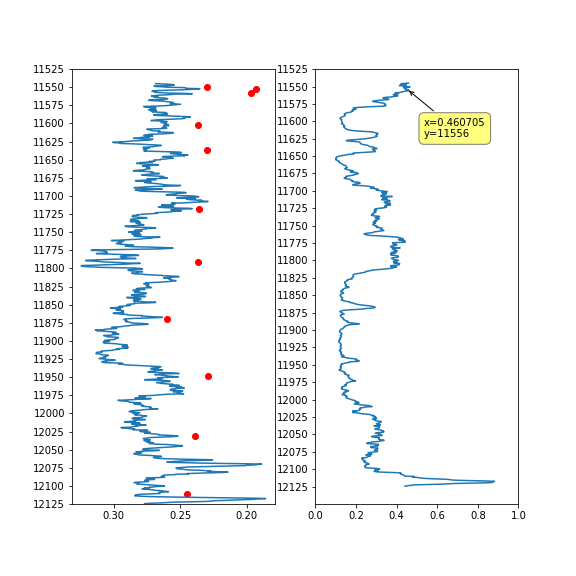

In [73]:
%matplotlib notebook
fig = plt.figure(figsize = (8,8))

ax0 = fig.add_subplot(121)
ax0.plot(well4['Porosity'], well4['DEPTH'])
ax0.scatter(well4coreporo['Porosity'],well4coreporo['Depth'], color = 'r')
ax0.invert_xaxis()
ax0.set_ylim(11525, 12150)
ax0.invert_yaxis()
ax0.set_yticks(np.arange(11525,12150, 25))

ax1 = fig.add_subplot(122)
ax1.set_ylim(11525, 12150)
ax1.set_xlim(0,1)
ax1.set_yticks(np.arange(11525, 12150, 25))
ax1.invert_yaxis()
ax1.plot(well4['Sw'], well4['DEPTH'])

mplcursors.cursor(hover = True)

<b> 
    
     Overview:
    
     1.OWC is detected exactyly at 12115 ft and field top at 11556 ft MD (will be converted to TVD later on). Total thickness is then 550 ft 
     
</b>

## Well 5 Poro Saturation - 
   <b> 
       
       1. Load and Compare Core and Given Porosity Data

In [91]:
#Loading log Derived Porosity Data
well5 = pd.read_csv(basedir + 'Well5-PorSw.csv')

In [92]:
well5coreporo = pd.read_csv(basedir + 'well5coreporo.csv', delimiter='\t')
well5coreporo.head()

#I will take 200 as my indicator stress - Applying 0.87 as compaction correction factor

,Sample,Depth,ambient,50,100,200,300,400,430
0,3,10655.8,20.5,20.37,20.28,20.20,20.13,20.08,20.07
1,15,10673.3,22.7,22.53,22.44,22.33,22.26,22.20,22.19
2,23,10694.6,19.1,18.76,18.68,18.60,18.54,18.50,18.48
3,40,10714.8,15.1,14.98,14.89,14.64,14.51,14.36,14.30
4,59,10735.9,25.2,25.04,24.94,24.83,24.77,24.70,24.68


In [94]:
#ambient porosity
phi_a = well5coreporo['ambient']/100
#200 erp porosity
phi_200 = well5coreporo['200']/100

core_porosity = findcoreporosity(phi_a, phi_200)

In [95]:
#Load Given RFT Data for Well1
well5rft = pd.read_csv(basedir + "well5RFT.csv")

<IPython.core.display.Javascript object>


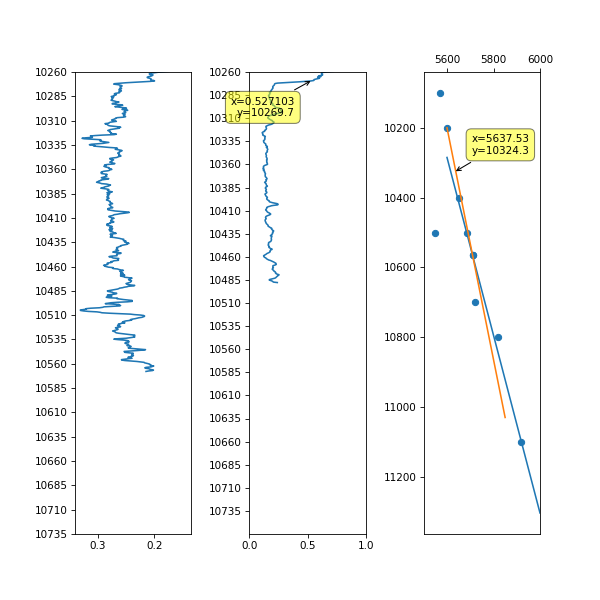

In [104]:
fig = plt.figure(figsize = (8,8))
plt.subplots_adjust(wspace = 0.5)

ax0 = fig.add_subplot(131)
ax0.plot(well5['Porosity'], well5['TVD'])
ax0.invert_xaxis()
ax0.set_ylim(10260, 10760)
ax0.invert_yaxis()
ax0.set_yticks(np.arange(10260, 10760, 25))
# ax0.plot(core_porosity,well5coreporo['Depth'], ls = 'dashdot', color = 'r')

ax1 = fig.add_subplot(132)
ax1.set_ylim(10260, 10760)
ax1.set_xlim(0,1)
ax1.set_yticks(np.arange(10260, 10760, 25))
ax1.invert_yaxis()
ax1.plot(well5['Sw'], well5['TVD'])

ax2 = fig.add_subplot(133)
ax2.xaxis.tick_top()
ax2.set_xlim(5500,6000)
ax2.scatter(well5rft['Pressure'], well5rft['TVD'])
ax2.invert_yaxis()

mplcursors.cursor(hover = True)

#Fitting lines to RFT
x = np.array([5710,5920]).reshape(-1,1)
y = np.array([10565,11100])

model = LinearRegression()
model.fit(x, y)

k = model.coef_
b = model.intercept_
test = np.array([5600,6000])
pred = predictModel(test, k, b)

ax2.plot(test, pred)

x1 = np.array([5570,5710]).reshape(-1,1)
y1 = np.array([10100,10565])

model = LinearRegression()
model.fit(x1, y1)

k = model.coef_
b = model.intercept_
test = np.array([5600,5850])
pred = predictModel(test, k, b)

ax2.plot(test, pred)
mplcursors.cursor(hover = True)

<b> 
    
     Overview:
    
     1.OWC is detected exactyly at 10565 ft and field top at 10270 ft MD (will be converted to TVD later on). Total thickness is then 550 ft 
     
</b>

## Well 6 Poro Saturation - 
   <b> 
       
       1. Load and Compare Core and Given Porosity Data

In [90]:
#Loading log Derived Porosity Data
well6 = pd.read_csv(basedir + 'Well6-PorSw.csv')

<IPython.core.display.Javascript object>


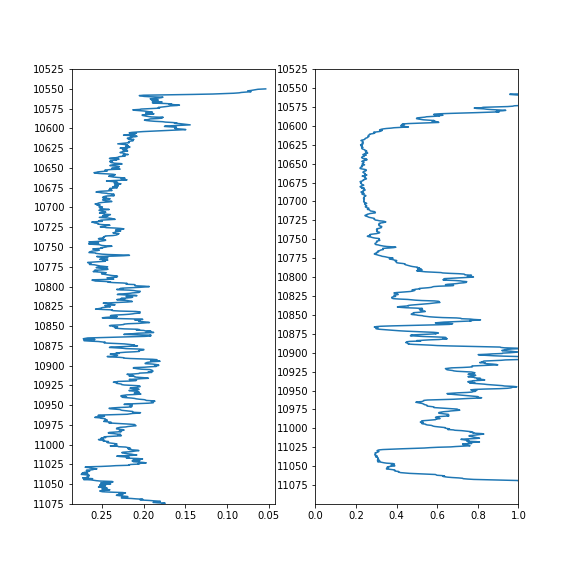

In [92]:
%matplotlib notebook
fig = plt.figure(figsize = (8,8))
plt.subplots_adjust(wspace = 0.5)

ax0 = fig.add_subplot(121)
ax0.invert_xaxis()
ax0.set_ylim(10525, 11100)
ax0.invert_yaxis()
ax0.set_yticks(np.arange(10525,11100, 25))
ax0.plot(well6['Porosity'], well6['DEPTH'])

ax1 = fig.add_subplot(122)
ax1.set_ylim(10525, 11100)
ax1.set_xlim(0,1)
ax1.set_yticks(np.arange(10525,11100, 25))
ax1.invert_yaxis()
ax1.plot(well6['Sw'], well6['DEPTH'])

mplcursors.cursor(hover = True)